# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Открыть файл с данными и изучить общую информацию. 

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
data = pd.read_csv('real_estate_data.csv')

Просмотр общей информации о датафрейме

In [3]:
display(data.head(5).T)
display(data.describe().T)

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
total_images,20,7,10,0,2
last_price,13000000.0,3350000.0,5196000.0,64900000.0,10000000.0
total_area,108.0,40.4,56.0,159.0,100.0
first_day_exposition,2019-03-07T00:00:00,2018-12-04T00:00:00,2015-08-20T00:00:00,2015-07-24T00:00:00,2018-06-19T00:00:00
rooms,3,1,2,3,2
ceiling_height,2.7,NaN,NaN,NaN,3.03
floors_total,16.0,11.0,5.0,14.0,14.0
living_area,51.0,18.6,34.3,NaN,32.0
floor,8,1,4,9,13


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23699.0,1.184900e+04,6.841456e+03,0.0,5924.50,11849.00,17773.5,23698.0
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0


In [4]:
print(len(data['locality_name'].unique()))
display(print(data['locality_name'].value_counts()))



365
locality_name
Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: count, Length: 364, dtype: int64


None

### Вывод

1) **total_images** - пропущенных, отрицательных значений нет

2) **last_price** -  пропущенных, отрицательных значений нет

3) **total_area** - пропущенных, отрицательных значений нет

4) **first_day_exposition** - необходимо перевести в формат даты

5) **rooms** - 197 нулевых значений. Видимо пользователь забыл указать, желательно их заполнить

6) **ceiling_height** - есть 9165 пропущенных значений - необходимо их заполнить, также есть аномально большие и малые значения, которые могут вносить неточность в решения заданий. Скорее всего пользователь не захотел/забыл указать этот параметр.

7) **total_floors** - необходимо изменить тип переменных из float в int. Есть 86 пропущеных значений, которые необходимо заполнить

8) **living_area** - есть 1903 пропущенных значений

9) **floor** - пропущенных, отрицательных значений нет

10) **is_apartment** всего есть 2775 значений. 50 из них 1, а остальные 2725 0.

11) **studio** - пропущенных, отрицательных значений нет. 149 студий.

12) **open_plan** - пропущенных, отрицательных значений нет. 67 квартиир с открытой планировкой.

13) **kitchen_area** - есть 2278 пропущенных значений.

14) **balcony** -  необхожимо изменить тип переменных из float в int. Есть 11519 пропущеных значений, логично, что это означает отсутствие балкона

15) **locality_name** - 49 пустых значений. Есть дубликаты например (поселок и посёлок и т.д.) - необходимо от них избавиться

16) **airports_nearest** - есть 5542 пропущенных значений

17) **cityCenters_nearest** - есть 5519 пропущенных значений

18) **parks_around3000** - необходимо изменить тип переменных из float в int. Есть 5518 пропущеных значений

19) **parks_nearest** - есть 15620 пропущенных значений  

20) **ponds_around3000** - необходимо изменить тип переменных из float в int. Есть 5518 пропущеных значений

21) **ponds_nearest** - есть 14589 пропущенных значений

22) **days_exposition** - необходимо изменить тип переменных из float в int. Есть 3181 пропущеных значений

## Предобработка данных

Обработка дубликатов в столбце **locality_name**. Поселок = Посёлок

In [5]:
print('кол-во пропусков в столбце locality_name:', data['locality_name'].isnull().sum())
print('кол-во уникальных значений в столбце locality_name:', len(data['locality_name'].unique()))
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
print('кол-во уникальных значений в столбце locality_name после обработки:',len(data['locality_name'].unique()))

кол-во пропусков в столбце locality_name: 49
кол-во уникальных значений в столбце locality_name: 365
кол-во уникальных значений в столбце locality_name после обработки: 331


Удаление полных дубликатов в датафрейме(если они есть)

In [6]:
## удаление полных дубликатов(если они есть)
print(len(data))
data.drop_duplicates().reset_index(drop = True)
print(len(data))

23699
23699


Заполнение пропусков в стоблце **rooms**. Для заполнения пропусков рассчитывается средняя площадь комнаты -  **mean_room_area** в исходных данных, затем для получения кол-ва комнат общая площадь делится на среднюю площадь комнаты и окргуляется до целого значения.

In [7]:
print('Before\n')
print(data['rooms'].describe())
## перевод из float в int
data['rooms'] = data['rooms'].astype('int')

mean_room_area = ((data.query('rooms != 0')['total_area'])/ data.query('rooms != 0')['rooms']).mean()

Before

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


In [8]:
def number_of_rooms(row):
    temp_rooms = 0
    rooms = row['rooms']
    if rooms == 0:
        temp_rooms = (row['total_area']/mean_room_area).round().astype('int')
        if temp_rooms > 0:
            rooms = temp_rooms
        else:
            rooms = 1
    return rooms

In [9]:
data['rooms'] = data.apply(number_of_rooms, axis = 1)
print('After:\n')
print(data['rooms'].describe())

After:

count    23699.000000
mean         2.079624
std          1.068044
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


Заполнение пропущенных значений **floors_total** путем замены пустых значений медианным значением.

Before:

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64
After:

count    23699.000000
mean        10.667750
std          6.585961
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


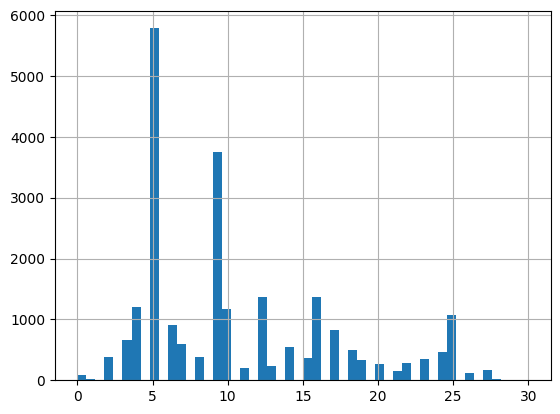

In [10]:
# ## floors_total
print('Before:\n')
print(data['floors_total'].describe())
data['floors_total'] = data['floors_total'].fillna(0)
data['floors_total'] = data['floors_total'].astype('int')

data['floors_total'].hist(bins = 50, range = (0,30))


data['floors_total'] = data['floors_total'].replace(0,data['floors_total'].median())
print('After:\n')
print(data['floors_total'].describe())


Заполнение пропущенных значений **ceiling_height**.
В данном столбце большое количество пропусков, поэтому необходимо придумать способ, который довольно точно заполнит эти данные. Большинство домов имеют типовый проект застройки -> можно предположить, что высота потолков будет коррелировать с кол-вом этажей в доме, поэтому попробуем заменить пропущенные значения на среднюю высоту потолков для домов с тем же кол-вом этажей, что и в доме, где есть прпоуск на месте высоты потолка.

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

count    23699.000000
mean         2.771613
std          0.992604
min          1.000000
25%          2.599719
50%          2.709259
75%          2.793191
max        100.000000
Name: ceiling_height, dtype: float64

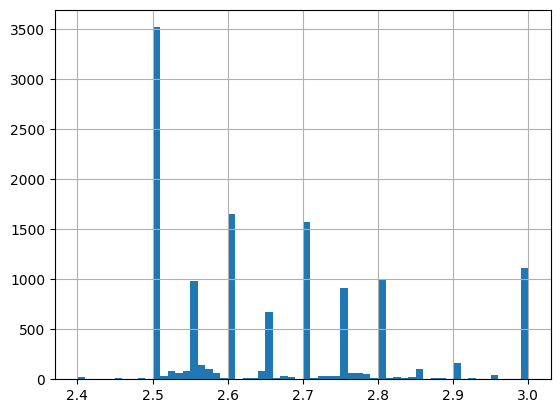

In [11]:
display(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins = 60, range = (2.4,3))
ceiling_median = data['ceiling_height'].median()
def fill_ceiling_height(row):
    temp_floors_total = row['floors_total']
    ceiling_height = row['ceiling_height']    
    temp_ceiling_height = (data.query('floors_total == @temp_floors_total')['ceiling_height'].mean())
    if math.isnan(ceiling_height):
        if math.isnan(temp_ceiling_height):
            ceiling_height = ceiling_median
        else:
            ceiling_height = temp_ceiling_height
    return ceiling_height
data['ceiling_height'] = data.apply(fill_ceiling_height, axis = 1)
display(data['ceiling_height'].describe())

### Вывод

**ВЫПОЛНЕНО**:
1) Удаление дубликатов в стоблце locality_name. Были удалены дубликаты из-за различного написания слов с буквами е и ё. К сожалению остались дубликаты в стообце locality_name, которые сложнее "отловить", вызванных синонимичностью названий. Например: поселок городского типа и городской поселок(не были найдены способы сделать это быстро), а также некотрые места получили новый статус со временем ( посёлок Кудрово - > Город)

2)  Удаление полных дубликатов(если они есть)

3) Заполнение столбца с кол-вом комнат, тк эта величина будет использоваться для ответа на вопросы задания. Для начала переведм величину из float в int. Для заполнения данных о кол-ве комнат. Было предположено, что есть некое соответсвие между общей площадью квартиры и кол-вом комнат. Была рассчитана средняя площадь приходящаяся на одну комнату - mean_room_area (не совсем корректно,т.к. не учитывается нежилая и кухонная площадь). Далее применяя функцию number_of_rooms, в которой кол-во комнат определяется округлением отношения общей площади квартиры к mean_room_area. Т.к. не может быть квартиры без комнаты, то в случае, когда результат округления был 0, то кол-ву комнат присваивалось значение 1.

4) floors_total необходимо заполнить для того, чтобы затем заполнить ceiling height. Переведены значений из float в int. По данным видно, что медиана кол-ва этажей домов в Санкт-Петербурге равна 9. Что показывает, что преобладает застройка 9-этажными домами, поэтому использовать медиану для заполнения пропусков более корректно, чем среднее.

5) в ceiling_height много пропущенных значений, которые надо восстановить для ответа на вопросы задания. Было бы логично предположить, что в большинстве преобладает типовая застройка домов. Например 5 и 9-этажные дома, встречаются чаще остальных, поэтому для заполнения значений ceiling_height были использованы данные о кол-ве этажей. Усреднив высоту потолка в домах с одинаковым кол-вом этажей, были получены значения для высоты потолка для всех объявлений. Для тех редких случаев, когда не была известна высота потолка, а домов с таким уровнем потолка не так много иcпользовалось медианнное значение распределения.

6) Остальные столбцы не заполнялись, т.к. их заполнение не требуется для решения поставленных задач. Или же их исправление может внести неточности в решение.

## Посчитайть и добавить в таблицу столбцы

Добавление столбцов: **first_day_exposition, year, month, weekday** - даты выставления объявления на продажу

In [12]:
data['first_day_exposition'] = data['first_day_exposition'].astype('str')

In [13]:
#first_day_exposition
print(data['first_day_exposition'].describe())
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['year'] = data['first_day_exposition'].dt.year
data['month'] = data['first_day_exposition'].dt.month
data['weekday'] = data['first_day_exposition'].dt.weekday



count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object


Добавление столбца: **day of abandon** - срок закрытия объявления в днях

In [14]:
# day_of_abandon
try:
    data['days_exposition'] = data['days_exposition'].astype('int')
except:
    pass
print(data['days_exposition'].describe())
print(data['days_exposition'].unique())
# day_of_abandon 
def day_of_abandon(row):
    date_of_abandon = None
    try:
        date_temp = row['first_day_exposition']
        days_temp = row['days_exposition']
        date_of_selling = date_temp + pd.Timedelta(days = days_temp)
    except:
        pass
    return date_of_abandon
data['day_of_abandon'] = data.apply(day_of_abandon, axis = 1)

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
[  nan   81.  558. ... 1360. 1007.  971.]


Столбец **price_for_sq_metr** со стоимостью квадратного метра

In [15]:
## price for sq_metr
data['price_for_sq_metr'] = data['last_price'] / data['total_area']
print(data['price_for_sq_metr'].describe())


count    2.369900e+04
mean     9.942166e+04
std      5.030680e+04
min      1.118349e+02
25%      7.658547e+04
50%      9.500000e+04
75%      1.142563e+05
max      1.907500e+06
Name: price_for_sq_metr, dtype: float64


Добавление категорий для этажа: первый, последний и другой. Информация хранится в **floor_description**

count      23699
unique         3
top       другой
freq       17441
Name: floor_description, dtype: object
floor_description
другой       17441
последний     3341
первый        2917
Name: count, dtype: int64


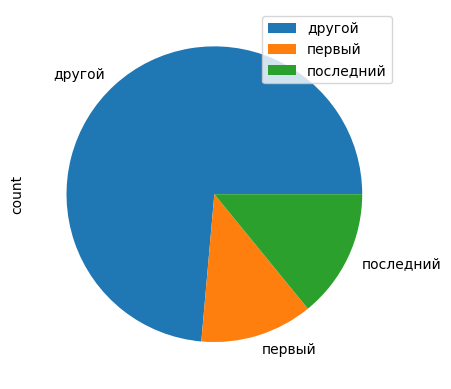

In [16]:
## определение этажа: первый, последний или другой.
# При помощи функции, которая floor_number - определен этаж в объявлении.(первый, последний или другой)
import matplotlib.pyplot as plt
def floor_number(row):
    floor_description = 'другой'
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        floor_description = 'первый'
    else:
        if (floor == floors_total) and (floors_total > 1):
            floor_description = 'последний'
        else:
            floor_description = 'другой'
    return floor_description

data['floor_description'] = data.apply(floor_number, axis = 1)
print(data['floor_description'].describe())
print(data['floor_description'].value_counts())
floor_stat =data.pivot_table(index = 'floor_description', values = 'total_area', aggfunc = 'count')
floor_stat.columns = ['count']
floor_stat.plot(kind = 'pie', y = 'count' )
plt.show()


Расчет отношения отношения общей,жилой и кухонных зон. Столбцы **living_total_ratio, kitchen_total_ratio**

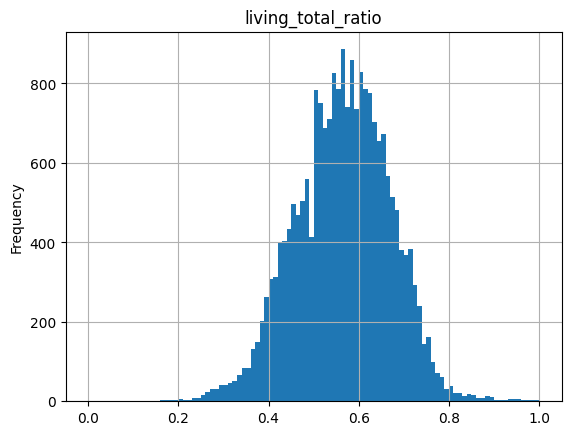

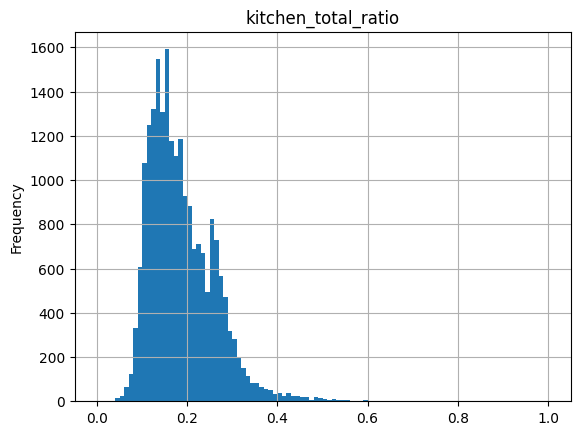

In [17]:
data['living_total_ratio'] = data['living_area']/data['total_area']
data['kitchen_total_ratio'] = data['kitchen_area']/data['total_area']
data['living_total_ratio'].plot(kind='hist',bins = 100, range = (0,1), grid = True)
plt.title('living_total_ratio')
plt.show()
data['kitchen_total_ratio'].plot(kind='hist',bins = 100, range = (0,1), grid = True)
plt.title('kitchen_total_ratio')
plt.show()

### Вывод

1) first_day_exposition. Используя to_datetime с верными параметрами, столбец был приведен к типу datetime, а затем используя методы для работы с форматом datetime были получены и добавлены необходимые столбцы year,month,day

2) day_of_abandon добавление столбца, который покажет дату снятия объявления. Было предположение, что эти данные могут пригодиться для решения задания, но далее они не использовались. Так что это просто тренирвока по работе с типом datetime.

3) price for sq_metr - посчитан и добавлен столбец цены за квадр.метр

4)  определение этажа: первый, последний или другой. При помощи функции floor_number, которая  - определяет этаж в объявлении.(первый, последний или другой)

5) Определение отношения общей,жилой и кухонных зон. Из полученных результатов видно, что отношение площади жилой зоны к общей имеет более симметричное распреление, чем отношение кухонной к общей, что логично, т.к. кухня обычно имеет меньшую площадь, чем жилая зона. 

## Провести исследовательский анализ данных и выполнить инструкции:

Рассмотреть параметр **total_area** и построить гистограмму для него

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

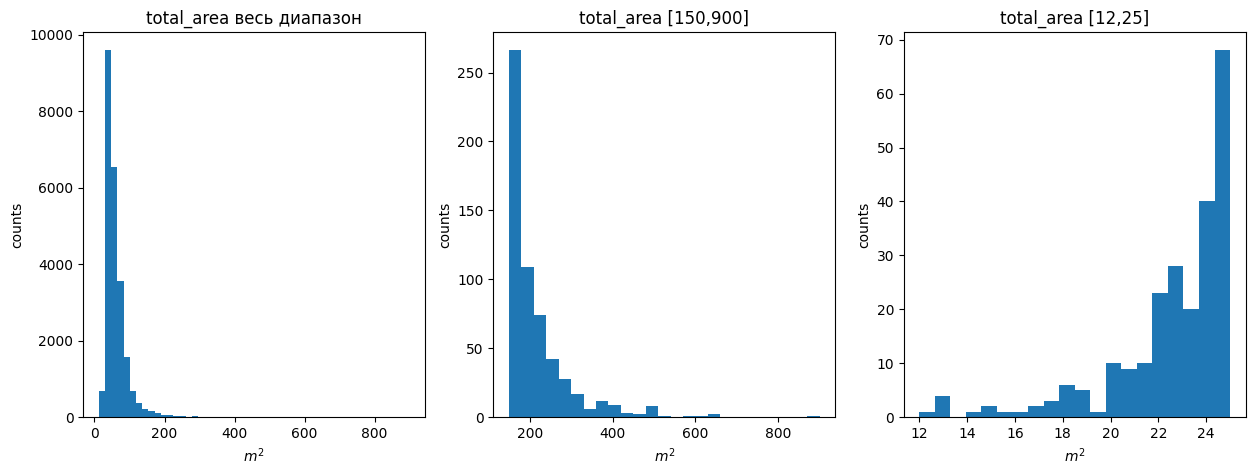

In [18]:
display(data['total_area'].describe())
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.hist(x = data['total_area'],bins = 50, range = (12, 900))
ax1.set(title = 'total_area весь диапазон', xlabel = '$m^2$', ylabel = 'counts')
ax2.hist(x = data['total_area'],bins = 25, range = (150, 900))
ax2.set(title = 'total_area [150,900]', xlabel = '$m^2$', ylabel = 'counts')
ax3.hist(x = data['total_area'],bins = 20, range = (12, 25))
ax3.set(title = 'total_area [12,25]', xlabel = '$m^2$', ylabel = 'counts')
plt.show()

Как видно из гистограмм и статистических характеристик столбец **total_area** содержит редкие выбросы в больших и маленьких значениях площади. Поэтому были отброшены значения total_area > 250. таких значений 112 штук - по гистограмме очевидно, что эти параметры встерчаются крайне редко. Избавление от этих значений чуть снизило среднюю площадь квартиры,но не изменило медианное значение. Минимальное значение было выбрано - 20 м^2, т.к. таких квартир мало и встречаются они редко, что может повлиять на результат.

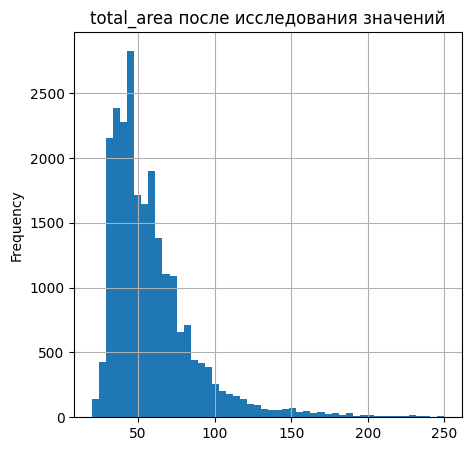

нижняя граница: 20 отброшено: 27 значений
верхняя граница: 250 отброшено: 112 значений


In [19]:
TOTAL_AREA_MIN = 20
TOTAL_AREA_MAX = 250

data.query('@TOTAL_AREA_MIN < total_area < @TOTAL_AREA_MAX')['total_area'].plot(
    kind='hist',bins = 50, range = (TOTAL_AREA_MIN,TOTAL_AREA_MAX),grid = True,figsize = (5,5))
plt.title('total_area после исследования значений')
plt.show()
print('нижняя граница: {} отброшено: {} значений'.format(
    TOTAL_AREA_MIN,(data.query('total_area < @TOTAL_AREA_MIN')['total_area'].count())))
print('верхняя граница: {} отброшено: {} значений'.format(
    TOTAL_AREA_MAX,(data.query('total_area > @TOTAL_AREA_MAX')['total_area'].count())))

Гистограмма после удаления выбросов


---

Рассмотреть параметр **last_price** и построить гистограмму для него

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

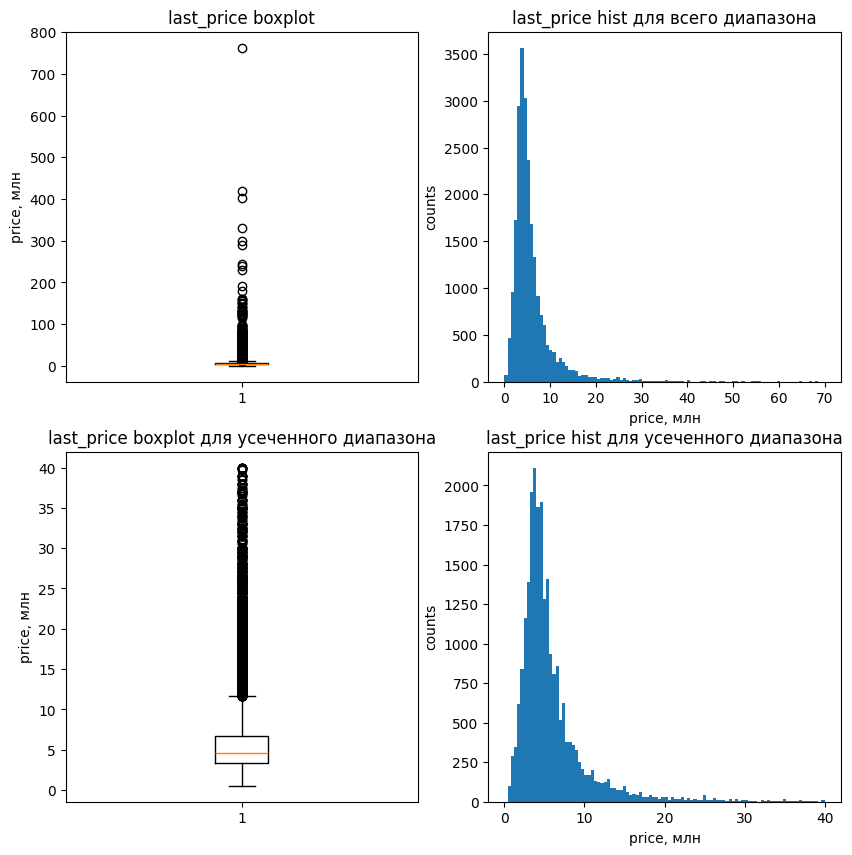

нижняя граница: 500000.0 отброшено: 14 значений
верхняя граница: 40000000.0 отброшено: 182 значений


In [20]:
display(data['last_price'].describe())
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

ax1.boxplot(data['last_price']/1.e+6)
ax1.set(ylabel = 'price, млн', title = 'last_price boxplot')

ax2.hist(x = data['last_price']/1.e+6, bins = 100, range = (0,70))
ax2.set(xlabel = 'price, млн', ylabel = 'counts', title = 'last_price hist для всего диапазона')

LAST_PRICE_MIN = 0.5e+6
LAST_PRICE_MAX = 40.e+6

data_lp = data.query('@LAST_PRICE_MIN < last_price < @LAST_PRICE_MAX')['last_price'] / 1.e+6
ax3.boxplot(data_lp)
ax3.set(ylabel = 'price, млн', title = 'last_price boxplot для усеченного диапазона')

ax4.hist(x = data_lp, bins = 100, range = (0,40))
ax4.set(xlabel = 'price, млн', ylabel = 'counts', title = 'last_price hist для усеченного диапазона')

plt.show()

print('нижняя граница: {} отброшено: {} значений'.format(
    LAST_PRICE_MIN,(data.query('last_price < @LAST_PRICE_MIN')['last_price'].count())))
print('верхняя граница: {} отброшено: {} значений'.format(
    LAST_PRICE_MAX,(data.query('last_price > @LAST_PRICE_MAX')['last_price'].count())))

**last_price** - По построенным диаграмме размаха и гистогамме были изучены значения last_price.Значения цены больше 40 млн уже крайне редки.Это значение было выбрано, как верхняя граница цен. Таким образом было отброшено 250 значений.В качестве нижней границы цен были отброшены квартиры со стоимостью менее 0.5 млн, таких значений 20 штук.

---

Рассмотреть параметр **rooms** и построить гистограмму для него

count    23699.000000
mean         2.079624
std          1.068044
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

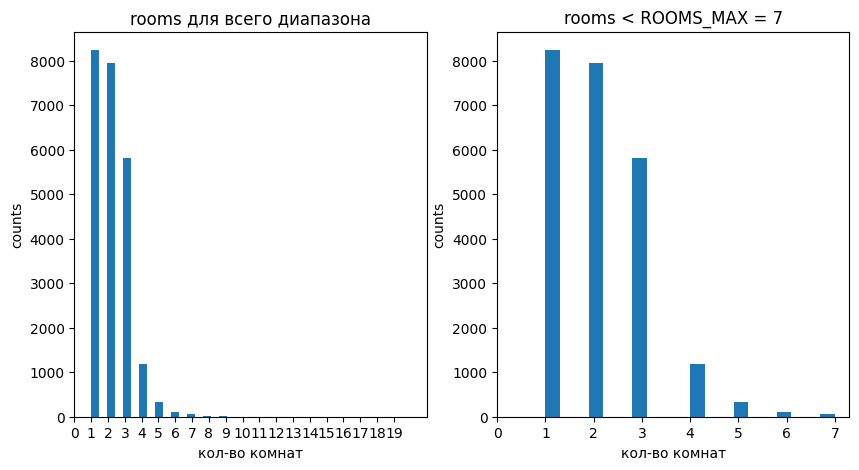

верхняя граница: 7 отброшено: 91 значений


In [21]:
display(data['rooms'].describe())
ROOMS_MAX = 7
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

ax1.hist(x = data['rooms'], bins = 40, range = (1,20))
ax1.set(xlabel = 'кол-во комнат', ylabel = 'counts', title = 'rooms для всего диапазона',
       xticks = (np.arange(0, 20, step=1)))

ax2.hist(x = data.query('rooms <= @ROOMS_MAX')['rooms'], bins = 20, range = (1,ROOMS_MAX))
ax2.set(xlabel = 'кол-во комнат', ylabel = 'counts', title = 'rooms < ROOMS_MAX = 7',
       xticks = (np.arange(0, 8, step=1)))

plt.show()

print('верхняя граница: {} отброшено: {} значений'.format(
    ROOMS_MAX,(data.query('rooms >= @ROOMS_MAX')['rooms'].count())))

Исключены те объявления в кот-ых кол-во комнат более 7,они редки, их всего 32


---

Рассмотреть параметр **ceiling_height** и построить гистограмму для него

count    23699.000000
mean         2.771613
std          0.992604
min          1.000000
25%          2.599719
50%          2.709259
75%          2.793191
max        100.000000
Name: ceiling_height, dtype: float64

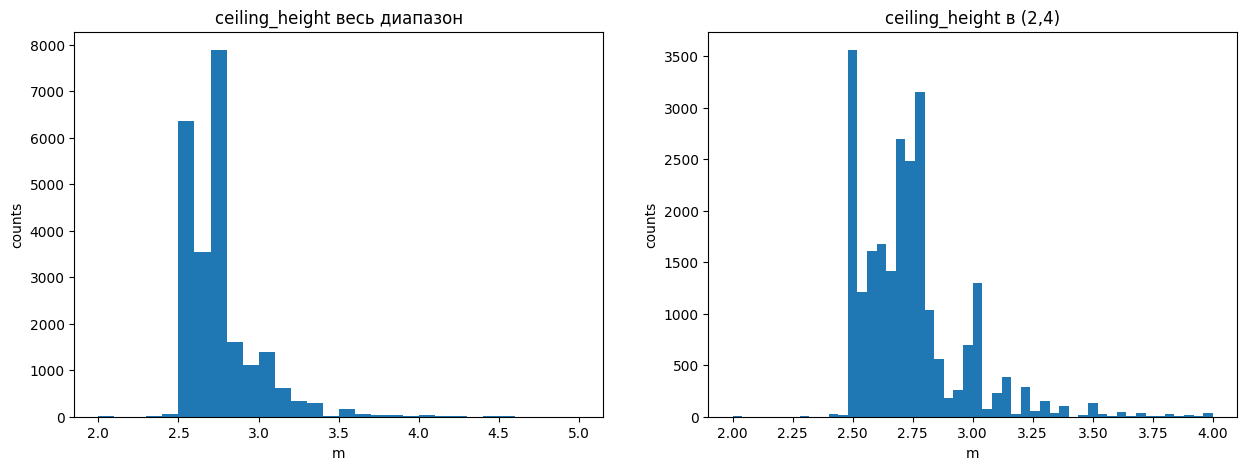

нижняя граница: 2 отброшено: 3 значений
верхняя граница: 4 отброшено: 76 значений


In [22]:
display(data['ceiling_height'].describe())
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))

ax1.hist(x = data['ceiling_height'], bins = 30, range = (2,5))
ax1.set(title = 'ceiling_height весь диапазон', ylabel = 'counts', xlabel = 'm')

CEILING_HEIGHT_MIN = 2
CEILING_HEIGHT_MAX = 4

ax2.hist(x = data['ceiling_height'], bins = 50, range = (CEILING_HEIGHT_MIN, CEILING_HEIGHT_MAX))
ax2.set(title = 'ceiling_height в (2,4)', ylabel = 'counts', xlabel = 'm')

plt.show()

print('нижняя граница: {} отброшено: {} значений'.format(
    CEILING_HEIGHT_MIN,(data.query('ceiling_height < @CEILING_HEIGHT_MIN')['ceiling_height'].count())))
print('верхняя граница: {} отброшено: {} значений'.format(
    CEILING_HEIGHT_MAX,(data.query('ceiling_height > @CEILING_HEIGHT_MAX')['ceiling_height'].count())))

**ceiling_height** - по исселдованным гистограммам сделан вывод, что высота потолка больше 4 и менее 2 метров, являются редкими и могут вносить неточночть в выборку, поэтому было отброшено 76 и 3 значения, соответственно.

---

Рассмотреть параметр **price_for_sq_metr** и построить гистограмму для него

count    2.369900e+04
mean     9.942166e+04
std      5.030680e+04
min      1.118349e+02
25%      7.658547e+04
50%      9.500000e+04
75%      1.142563e+05
max      1.907500e+06
Name: price_for_sq_metr, dtype: float64

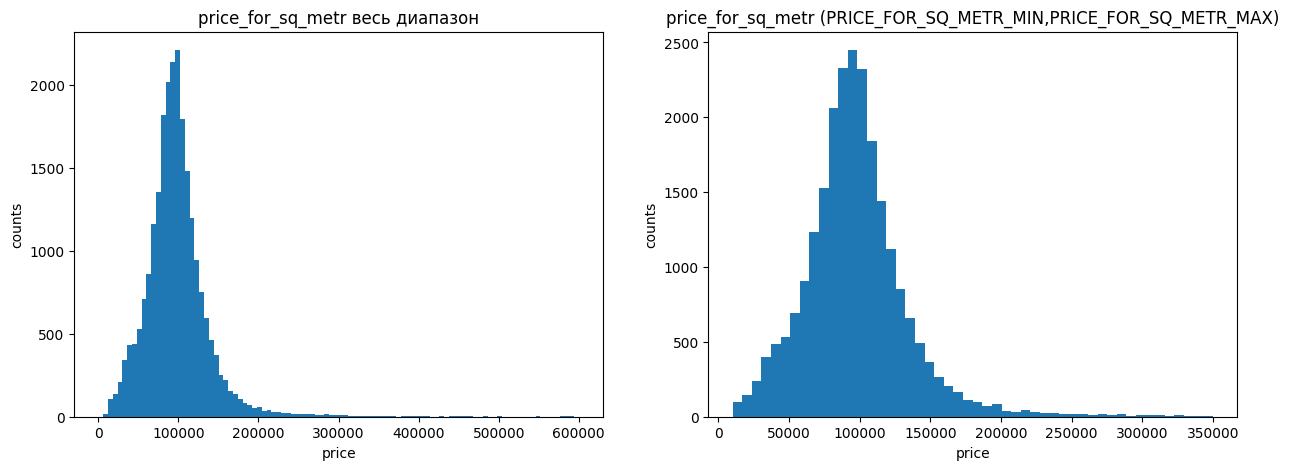

нижняя граница: 10000.0 отброшено: 3 значений
верхняя граница: 350000.0 отброшено: 110 значений


In [23]:
display(data['price_for_sq_metr'].describe())

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))

ax1.hist(x = data['price_for_sq_metr'], bins = 100, range =(1.11e+02,6e+05))
ax1.set(title = 'price_for_sq_metr весь диапазон', xlabel = 'price', ylabel = 'counts')

PRICE_FOR_SQ_METR_MIN = 1e+04
PRICE_FOR_SQ_METR_MAX = 3.5e+05

ax2.hist(x = data.query('@PRICE_FOR_SQ_METR_MIN < price_for_sq_metr < @PRICE_FOR_SQ_METR_MAX')['price_for_sq_metr'],
         bins = 50, range =(PRICE_FOR_SQ_METR_MIN,PRICE_FOR_SQ_METR_MAX))
ax2.set(title = 'price_for_sq_metr (PRICE_FOR_SQ_METR_MIN,PRICE_FOR_SQ_METR_MAX)', xlabel = 'price', ylabel = 'counts')

plt.show()

print('нижняя граница: {} отброшено: {} значений'.format(
    PRICE_FOR_SQ_METR_MIN,(data.query('price_for_sq_metr < @PRICE_FOR_SQ_METR_MIN')['price_for_sq_metr'].count())))
print('верхняя граница: {} отброшено: {} значений'.format(
    PRICE_FOR_SQ_METR_MAX,(data.query('price_for_sq_metr > @PRICE_FOR_SQ_METR_MAX')['price_for_sq_metr'].count())))


цена за квадр метр -  price_for_sq_metr. Было решение исследовать и эту характеристику, тк она тоже является важной при анализе стоимости квартир и может вности ошибку в результат исследования. По гистогамме были изучены значения price_for_sq_metr .Значения цены больше 350 тыс. за 1м^2 уже крайне редки.Это значение было выбрано, как верхняя граница цен. Таким образом было отброшено 110 значений.В качестве нижней границы цен были отброшены квартиры со стоимостью менее 10 тыс. за 1м^2 ,таких значений  3 штуки.

----

Рассмотреть параметр **days_exposition** и построить гистограмму для него

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

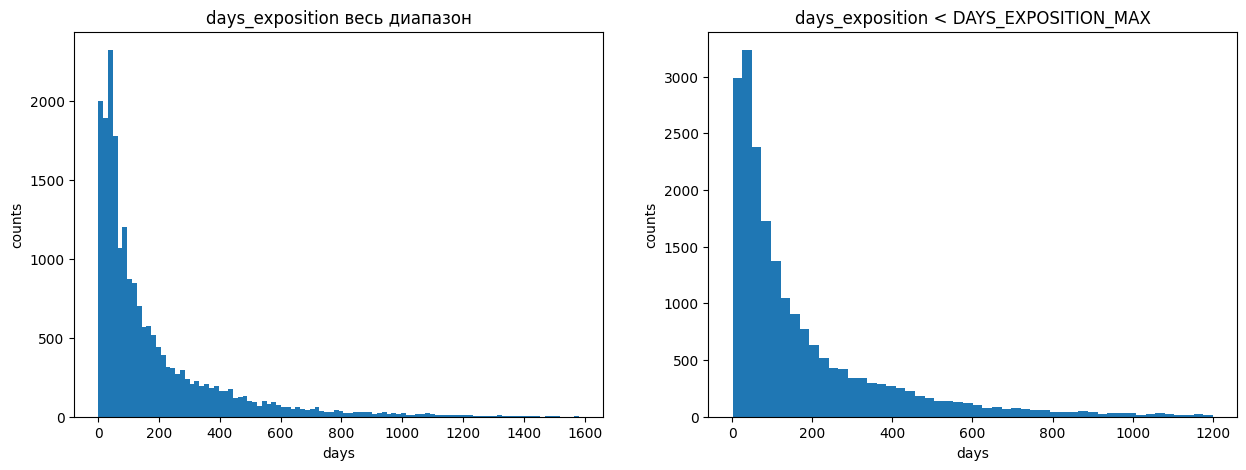

верхняя граница: 1200 отброшено: 91 значений


In [24]:
display(data['days_exposition'].describe())

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))

ax1.hist(x = data['days_exposition'], bins = 100, range =(1,1580))
ax1.set(title = 'days_exposition весь диапазон', xlabel = 'days', ylabel = 'counts')

DAYS_EXPOSITION_MAX = 1200

ax2.hist(x = data.query('days_exposition < @DAYS_EXPOSITION_MAX')['days_exposition'],
         bins = 50, range =(1,DAYS_EXPOSITION_MAX))
ax2.set(title = 'days_exposition < DAYS_EXPOSITION_MAX', xlabel = 'days', ylabel = 'counts')

plt.show()

print('верхняя граница: {} отброшено: {} значений'.format(
   DAYS_EXPOSITION_MAX,(data.query('days_exposition > @DAYS_EXPOSITION_MAX')['days_exposition'].count())))

**days_exposition.** Аналогично цене за квадр метр, необходимо исследовать и эту величину. Распределение явно имеет сдвиг влево, поэтому медиана намного меньше, чем среднее. Даже если не учитывать объявления для которых прошло более 1200 дней среднее все равно явно больше медианы. В качестве границы для отсекания было выбрано значние 1200 дней. 

### Вывод

In [25]:
# Избавление от редких и выделяющихся значений
# good_data 
good_data = data.query(
    '(@TOTAL_AREA_MIN < total_area < @TOTAL_AREA_MAX) & (@LAST_PRICE_MIN < last_price < @LAST_PRICE_MAX) & (rooms <= @ROOMS_MAX) & (@PRICE_FOR_SQ_METR_MIN < price_for_sq_metr < @PRICE_FOR_SQ_METR_MAX) & (days_exposition < @DAYS_EXPOSITION_MAX) & (@CEILING_HEIGHT_MIN < ceiling_height < @CEILING_HEIGHT_MAX)')
good_data = good_data.reset_index(drop=True)
good_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20081 entries, 0 to 20080
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            20081 non-null  int64         
 1   total_images          20081 non-null  int64         
 2   last_price            20081 non-null  float64       
 3   total_area            20081 non-null  float64       
 4   first_day_exposition  20081 non-null  datetime64[ns]
 5   rooms                 20081 non-null  int64         
 6   ceiling_height        20081 non-null  float64       
 7   floors_total          20081 non-null  int64         
 8   living_area           18433 non-null  float64       
 9   floor                 20081 non-null  int64         
 10  is_apartment          2433 non-null   object        
 11  studio                20081 non-null  bool          
 12  open_plan             20081 non-null  bool          
 13  kitchen_area    

Изучены следующие параметры: площадь, цена, число комнат, высота потолков. Построены гистограммы для каждого параметра. Затем полученные результаты исследовательского анализа будут учтены (Будут отброшены редкие и выбивающиеся значения).

1) total_area отброшены значения total_area > 250. таких значений 112 штук - по гистограмме очевидно, что эти параметры встерчаются крайне редко.Избавление от этих значений чуть снизило среднюю площадь квартиры,но не изменило медианное значение. Минимальное значение было выбрано - 20 м^2, т.к. таких квартир мало и встречаются они редко, что может повлиять на результат.

2) last_price - По построенным диаграмме размаха и гистогамме были изучены значения last_price.Значения цены больше 40 млн уже крайне редки.Это значение было выбрано, как верхняя граница цен. Таким образом было отброшено 250 значений.В качестве нижней границы цен были отброшены квартиры со стоимостью менее 0.5 млн, таких значений 20 штук.

3) rooms - Исключены те объявления в кот-ых кол-во комнат более 7,они редки, их всего 32

4) ceiling_height - по исселдованным гистограммам сделан вывод, что высота потолка больше 4 и менее 2 метров, являются редкими и могут вносить неточночть в выборку, соответственно было отброшено 76 и 3 значения, соответственно.

5) цена за квадр метр -  price_for_sq_metr. Было решение исследовать и эту характеристику, тк она тоже является важной при анализе стоимости квартир и может вности ошибку в результат исследования. По гистогамме были изучены значения price_for_sq_metr .Значения цены больше 350 тыс. за 1м^2 уже крайне редки.Это значение было выбрано, как верхняя граница цен. Таким образом было отброшено 110 значений.В качестве нижней границы цен были отброшены квартиры со стоимостью менее 10 тыс. за 1м^2 ,таких значений  3 штуки.

6) days_exposition. Аналогично цене за квадр метр, необходимо исследовать и эту величину. Распределение явно имеет сдвиг влево, поэтому медиана намного меньше, чем среднее. Даже если не учитывать объявления для которых прошло более 1200 дней среднее все равно явно больше медианы. В качестве границы для отсекания было выбрано значние 1200 дней. 

## Выполнение заданий

Вывод для каждого блока будет написан отдельно.

**Скорость продаж**
 - Опишите, сколько обычно занимает продажа. 
 - Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

count    20081.000000
mean       174.527763
std        204.906614
min          1.000000
25%         45.000000
50%         94.000000
75%        226.000000
max       1199.000000
Name: days_exposition, dtype: float64

% значений меньших 30 дней 17.79%
% значений больших 445 дней 9.98%


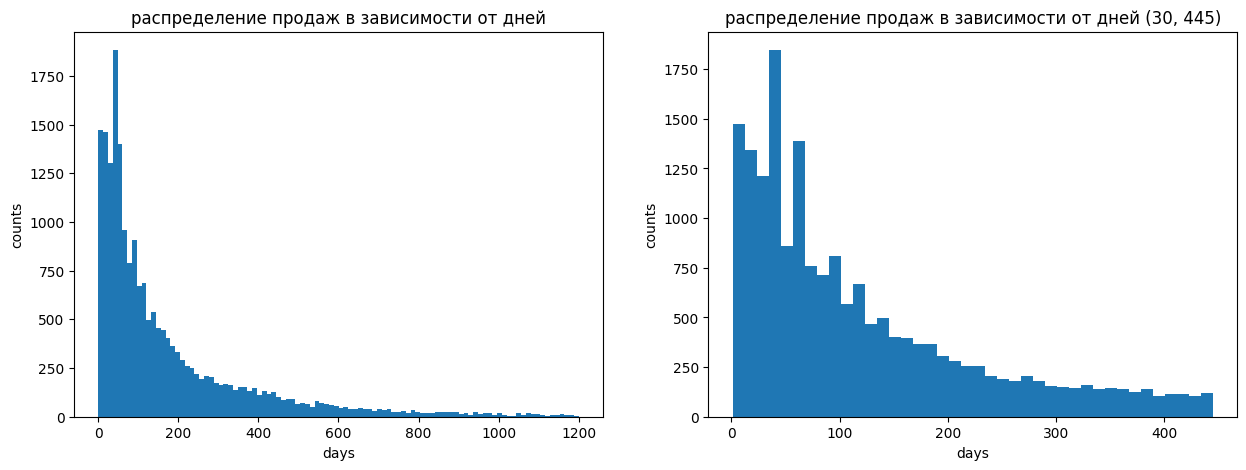

In [26]:
display(good_data['days_exposition'].describe())
print('% значений меньших 30 дней',str(round(stats.percentileofscore(good_data['days_exposition'], 30), 2)) + '%')
print('% значений больших 445 дней',str(round(100 - stats.percentileofscore(good_data['days_exposition'], 445), 2)) + '%')

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 5))

ax1.hist(x = good_data['days_exposition'], bins = 100, range = (1,1200))
ax1.set(title = 'распределение продаж в зависимости от дней', xlabel = 'days', ylabel = 'counts')

ax2.hist(x = good_data.query('days_exposition < 445')['days_exposition'], bins = 40, range = (1,445))
ax2.set(title = 'распределение продаж в зависимости от дней (30, 445)', xlabel = 'days', ylabel = 'counts')

plt.show()

### Вывод

Очевидно, что данные сдвинуты влево. среднее > медианы.
В качестве критерия быстрой продажи квартиры было выбрано значение 30 - продать квартиру за 1 месяц можно считать быстрым результатом. Этому соответствует 17% объявлений. Найти покупателя квартиры за 30 дней, при среднем значении 174 дня, а медианы 94 - это может являться бысторой сделкой. В качестве долгой покупки было выбрано значение 445 дней, более 10% объявлений искали покупателя дольше. Т.к. распределение имеет явный сдвиг влево, то значение долгих сделок и быстрых сделой не будет симметричным относительно медианы или среднего. Если отбросить значения долгих сделок, то можно заметить сильное уменьшение среднего, на  целых 55 дней.


----

 **Стоимость продаж**
 - Какие факторы больше всего влияют на стоимость квартиры? 
 - Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. 
 - Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
 - Также изучите зависимость от даты размещения: дня недели, месяца и года.

Построим матрицу корреляции для значений столбцов **last_price, rooms, price_for_sq_metr, cityCenters_nearest**, чтобы увидеть возможные зависимости между данными

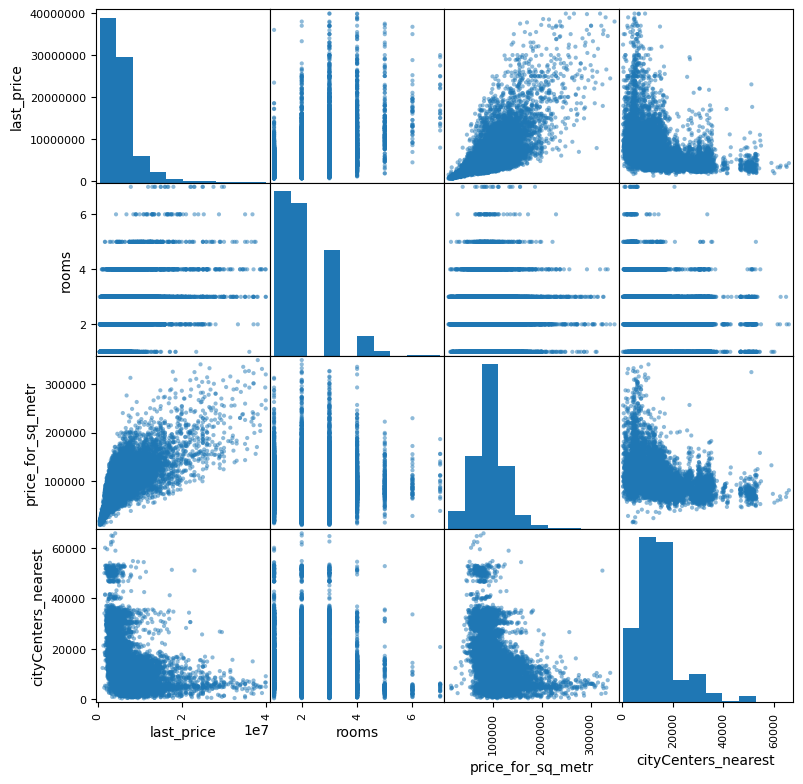

,last_price,rooms,price_for_sq_metr,cityCenters_nearest
last_price,1.000000,0.500819,0.677268,-0.340378
rooms,0.500819,1.000000,-0.065078,-0.165077
price_for_sq_metr,0.677268,-0.065078,1.000000,-0.391572
cityCenters_nearest,-0.340378,-0.165077,-0.391572,1.000000


In [27]:
pd.plotting.scatter_matrix(
    good_data[['last_price','rooms','price_for_sq_metr','cityCenters_nearest',]],
    figsize=(9, 9),
grid = True)
plt.show()
good_data[['last_price','rooms','price_for_sq_metr','cityCenters_nearest',]].corr()

### Вывод

   По виду гистограмм на которых отображены совместные рапсределения величин можно сделать вывод, что цена квартиры зависит от расстояния до центра города, чем меньше расстояние, тем дороже стоимость квартиры, что вполне логично.

   Большое количество комнат не всегда означает, что цена на квартиру будет высокая, как видно из гистограммы 3 комнатыне квартиры стоят дороже чем квартиры содержащие >5 комнат, видимо это связано с расстоянием до центра города.
    
   Цена квартиры зависит от стоимости квадратратоного метра, с увеличением цены стоимости квадр метра, растет и стоимость квартиры, видимо засчет увеличения площади квартиры или других параметров.
   

---

**Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.**

Распределение объявлений по этажам.

floor_description
другой       14932
последний     2732
первый        2417
Name: count, dtype: int64

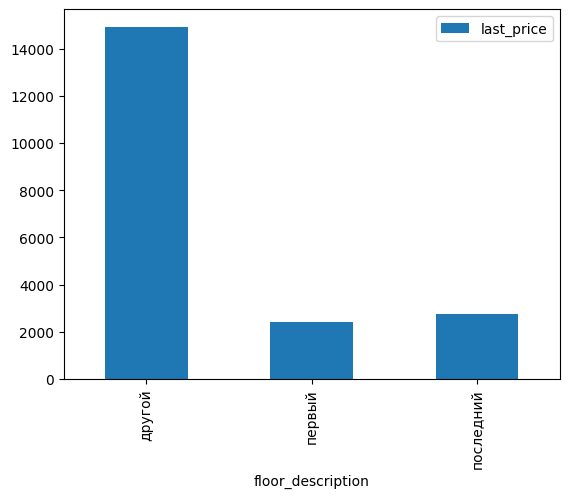

In [28]:
display(good_data['floor_description'].value_counts())
good_data.pivot_table(index = 'floor_description', values = 'last_price', aggfunc = ['mean','count'])['count'].plot(kind='bar')
plt.show()

Выведем распределение по ценам квартир для каждой категории этажности.

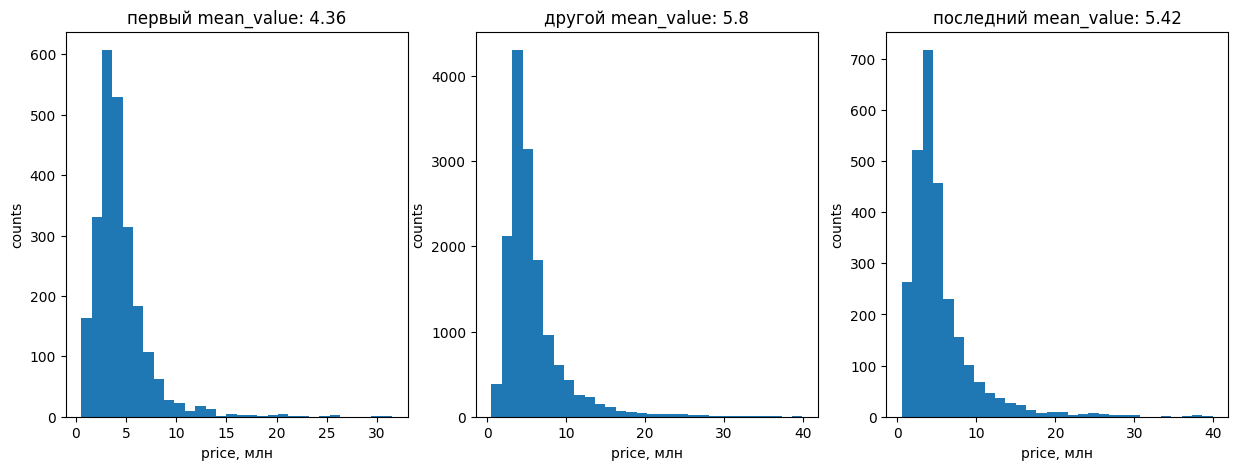

In [29]:
floors_list = ['первый','другой','последний']

fig, axs = plt.subplots(1,3,figsize = (15, 5))
for i in range(len(floors_list)):
    axs[i].hist(x = good_data.query('floor_description == @floors_list[@i]')['last_price'] / 1e6,
               bins = 30)
    axs[i].set(title = str(floors_list[i]) + ' mean_value: ' + str(round(good_data.query('floor_description == @floors_list[@i]')['last_price'].mean()/1e6, 2)),
               xlabel = 'price, млн', ylabel = 'counts')
plt.show()

### Вывод

Квартиры на первом этаже, как и следовало ожидать имеют наименьшую среднюю стоимость, квартиры на последних этажах явно дороже, но все равно уступают квартирам "посередине".

---

**Изучите зависимость от даты размещения: дня недели, месяца и года.**

Построим распределения кол-ва объявлений и стоимости от года, месяца и дня недели.

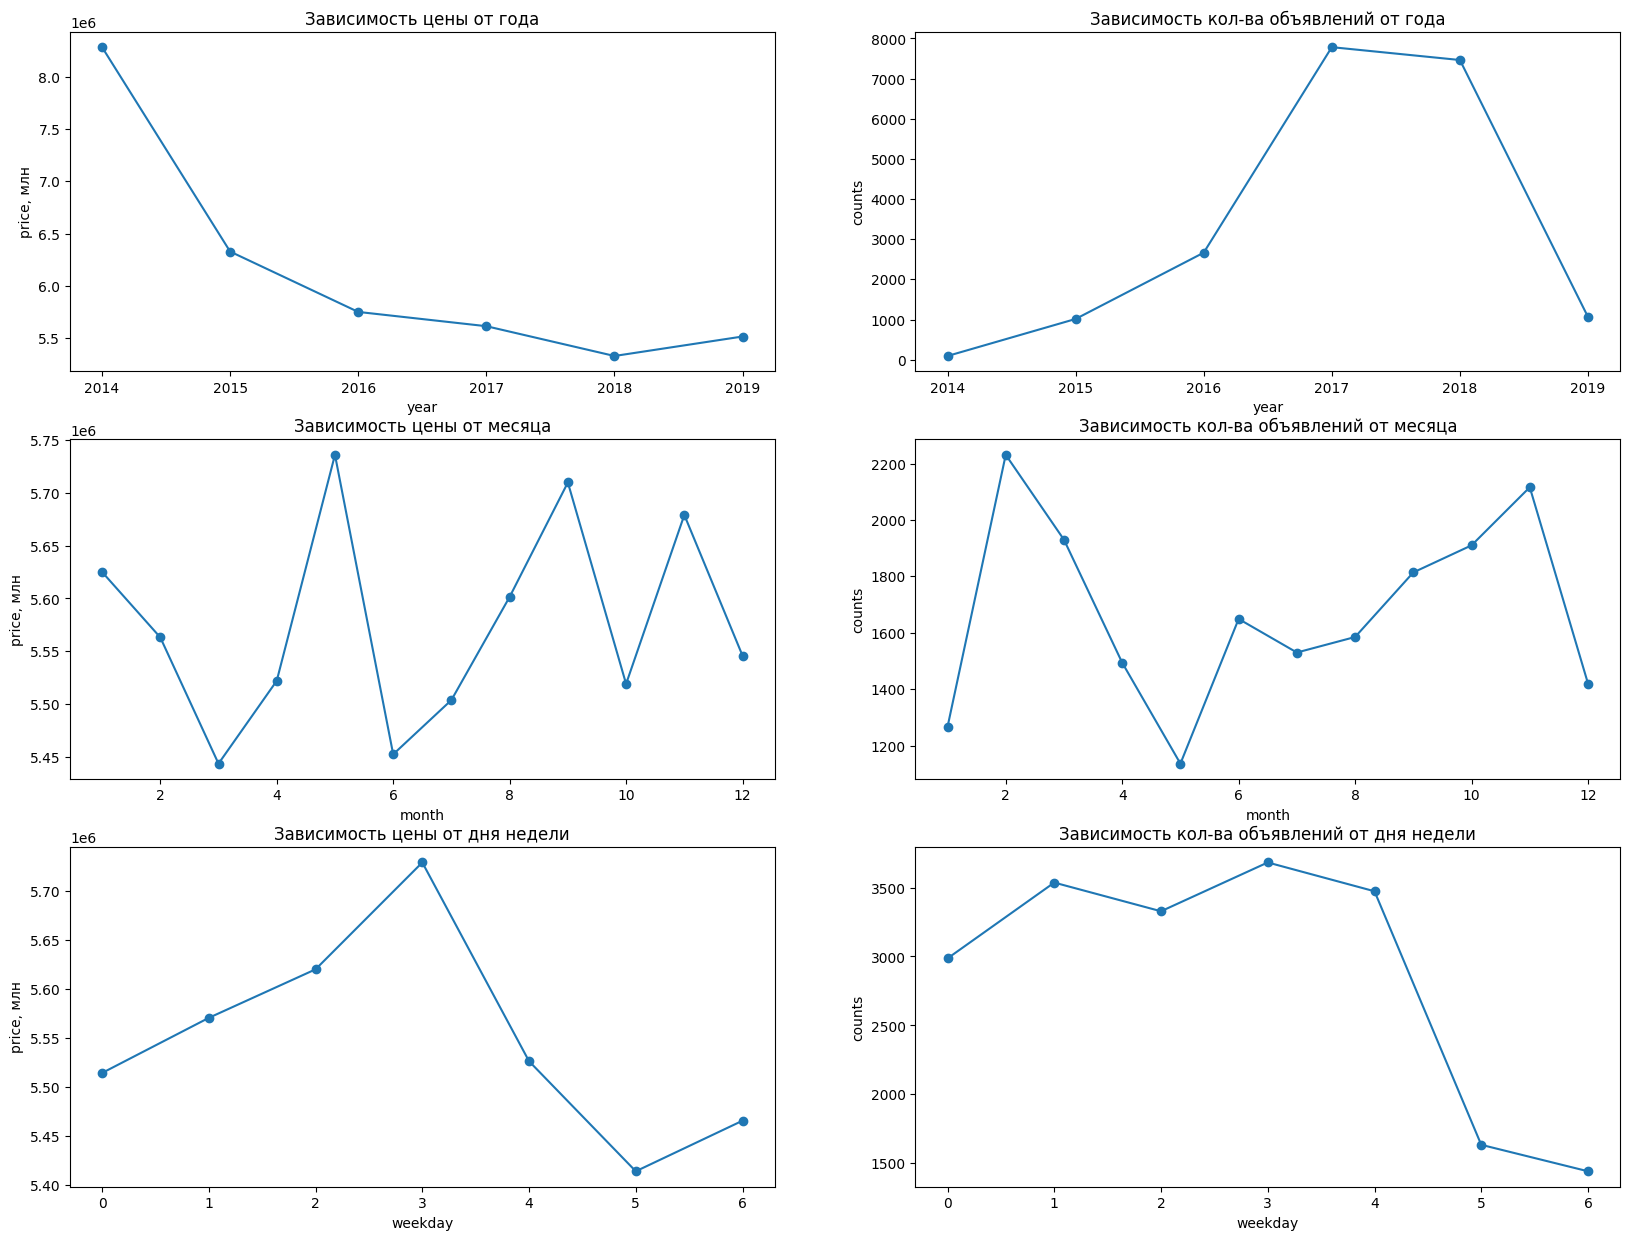

In [30]:
x_list = ['year', 'month', 'weekday']
y_list = ['price, млн', 'counts']
agg_list = ['mean', 'count']
title_list_k = ['цены', 'кол-ва объявлений']
title_list_i = ['года', 'месяца','дня недели']
fig, axs = plt.subplots(3,2, figsize = (20,15))
for i in range(0,3):
    for k in range(0,2):
        good_data.pivot_table(index = x_list[i], values = 'last_price', aggfunc = agg_list[k])
        axs[i][k].plot(good_data.pivot_table(index = x_list[i], values = 'last_price', aggfunc = agg_list[k]),
                      marker = "o")
        axs[i][k].set(title = 'Зависимость ' + title_list_k[k]+ ' от ' + title_list_i[i],
                     xlabel = x_list[i], ylabel = y_list[k], 
                     )

plt.show()

### Вывод

в 2014 году средняя цена квартиры в объявлении была максимальной, видимо это связано с малым кол-вом объялений. С каждым годом кол-во объявлений расло и вышло на пологий уровень в 2018. 2019 год не полностью вошел в архив поулченных данных, поэтому ориентироваться только на данные 2019 не вполне корректно. Средняя цена уменьшалась с ростом кол-ва объявлений, что соотвествует полученным данным о ценах из предыдуищх гостограмм.

Из графиков видно, что увеличение параметра кол-ва объялений ведет за собой уменьшение средней стоимости квартиры Т.к. медианное значение стоимости квартиры меньше среднего. Как показыает график цены на квартиры уменьшаются в летние месяцы, но есть рост в сентябре,также имеет минимум еще и в мае, но как видно из графика кол-ва объявлений это связано с уменьшением объявлений в мае. Кол-во объявлений максимально в феврале и ноябре. просадка случается в мае, что можно связать с майскими праздниками.
Больше объявлений опубликовано в будние, чем в выходные.



-----


 - Выберите 10 населённых пунктов с наибольшим числом объявлений. 
 - Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
 - Выделите населённые пункты с самой высокой и низкой стоимостью жилья. 

Выберите 10 населённых пунктов с наибольшим числом объявлений.

In [31]:
adverts = good_data.pivot_table(index = 'locality_name', values = 'total_area', aggfunc = 'count')
adverts.columns = ['counts']
adverts = adverts.sort_values(by = 'counts', ascending = False)
top_adverts = adverts.head(10)
display(top_adverts)

,counts
locality_name,
Санкт-Петербург,13280
посёлок Мурино,548
посёлок Шушары,407
Всеволожск,334
Колпино,307
посёлок Парголово,301
Пушкин,299
деревня Кудрово,298
Гатчина,267


Посчитайте среднюю цену квадратного метра в этих населённых пунктах.

,price_for_sq_metr
locality_name,
Санкт-Петербург,108891.192598
Пушкин,101599.341278
деревня Кудрово,92481.848071
посёлок Парголово,89423.993853
посёлок Мурино,85714.423911
посёлок Шушары,77985.044318
Колпино,74763.339311
Гатчина,67938.480307
Всеволожск,66788.662305


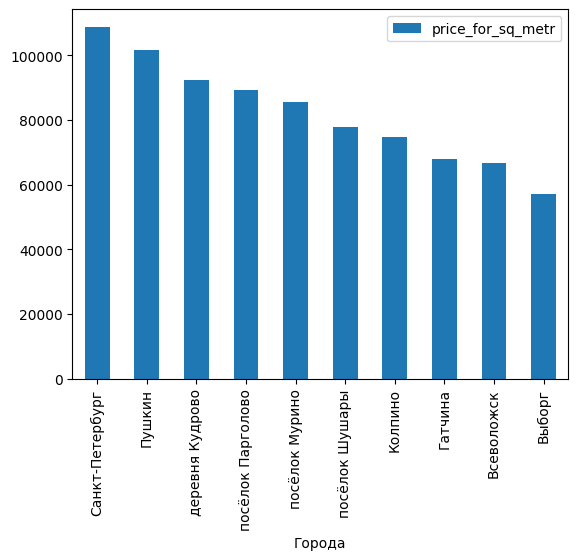

In [32]:
mean_sq_top_adverts = good_data.query('locality_name in @top_adverts.index').pivot_table(
index = 'locality_name', values = 'price_for_sq_metr')
mean_sq_top_adverts = mean_sq_top_adverts.sort_values(by = 'price_for_sq_metr', ascending = False)
display(mean_sq_top_adverts)
mean_sq_top_adverts.plot(kind = 'bar')
plt.xlabel('Города')
plt.show()

Выделите населённые пункты с самой высокой и низкой стоимостью жилья.

In [33]:
good_adverts = adverts.query('counts > 50')
print('Кол-во населенных пунктов с кол-вом объявлений > 30:', len(good_adverts))

Кол-во населенных пунктов с кол-вом объявлений > 30: 33


In [34]:
mean_last_price_adverts = good_data.query('locality_name in @good_adverts.index').pivot_table(
index = 'locality_name',values = 'last_price')
mean_last_price_adverts = mean_last_price_adverts.sort_values(by = 'last_price', ascending = False)
mean_last_price_adverts.head(10).index
mean_last_price_adverts['last_price'].head(10)

locality_name
Санкт-Петербург      6.636237e+06
Сестрорецк           6.138137e+06
Пушкин               5.889726e+06
посёлок Парголово    4.393433e+06
Кудрово              4.393146e+06
деревня Кудрово      4.242326e+06
Петергоф             4.226183e+06
Кронштадт            4.061741e+06
посёлок Шушары       4.052965e+06
Сосновый Бор         3.964186e+06
Name: last_price, dtype: float64

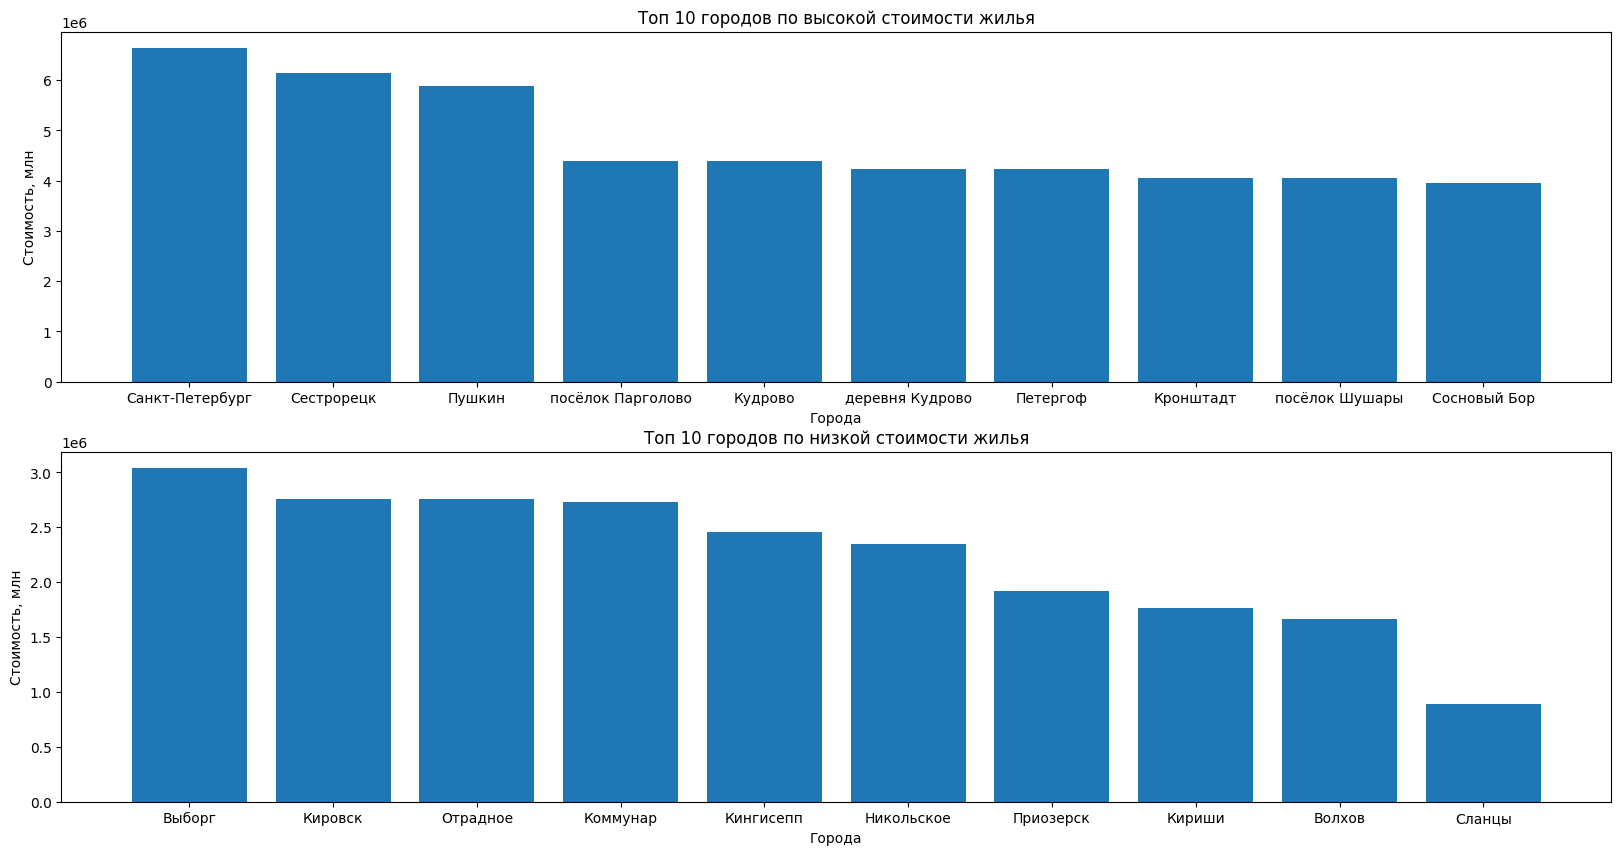

In [35]:


fig, (ax1, ax2) = plt.subplots(2,1, figsize = (20,10))

ax1.bar(mean_last_price_adverts.head(10).index, mean_last_price_adverts['last_price'].head(10))
ax1.set(title = 'Топ 10 городов по высокой стоимости жилья', xlabel = 'Города', ylabel = 'Стоимость, млн')

ax2.bar(mean_last_price_adverts.tail(10).index, mean_last_price_adverts['last_price'].tail(10))
ax2.set(title = 'Топ 10 городов по низкой стоимости жилья', xlabel = 'Города', ylabel = 'Стоимость, млн')

plt.show()

### Вывод

Получены данные по зависимости стоимости кв. метра от города для нас.пунктов с наибольшим кол-вом объявлений. Также продемонстрированы средние стоимости квартир в самых дорогих и наиболее дешевых нас.пунктах. Для более надежного представления результатов Использовались города с кол-вом объявоений более 50. В результатах "всплывает" неточность допущенная при обработке данных.(на одной из гистограмм Кудрово встерчается 2 раза)


---

- Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
- Выделите квартиры в Санкт-Петербурге ('locality_name'). 
- Необходимо выяснить, какая область входит в центр. 
    Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. 
    После этого посчитайте среднюю цену для каждого километра. 
    Постройте график: он должен показывать, как цена зависит от удалённости от центра. 
    Определите границу, где график сильно меняется — это и будет центральная зона.

Для начала выделим объявления, которые соответсвуют Санкт-Петербургу и удалим из них, те объяления в которых отсутствют информация об удаленности от центра (таких объявлений менее 30). Создадим столбец с дистанцией от центра в км, округленных до целых значений.

In [36]:
spb_adverts = good_data.query('locality_name == "Санкт-Петербург"')
spb_adverts = spb_adverts.dropna(subset=(['cityCenters_nearest'])).reset_index(drop = True)
spb_adverts['distance_km'] = (spb_adverts['cityCenters_nearest']/1000).round()

Построим распределение цен на квартиры в завимости от удаления от центра

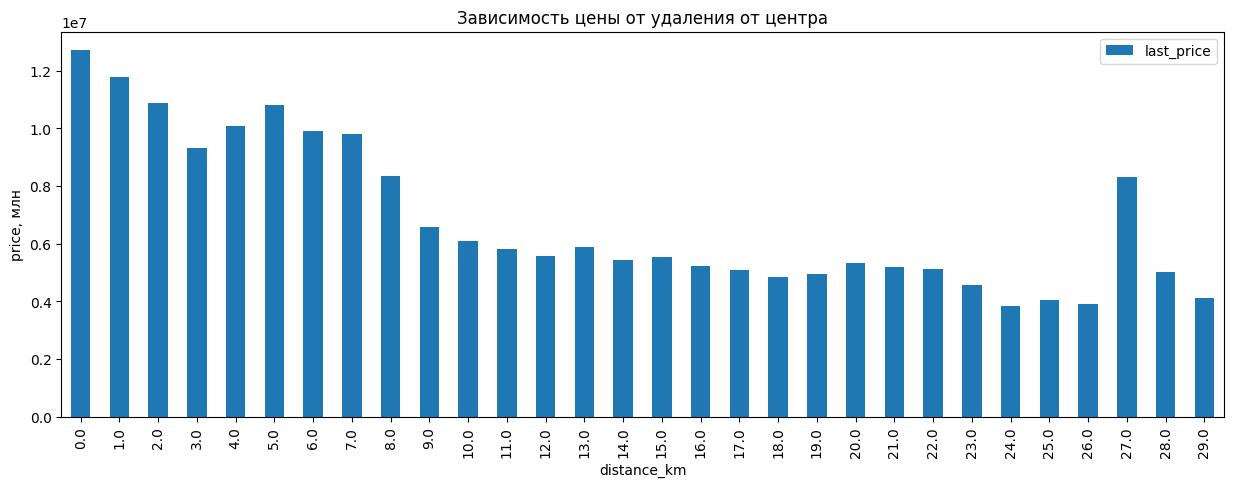

In [37]:
spb_price_km = spb_adverts.pivot_table(index = 'distance_km', values = 'last_price')
spb_price_km.plot(kind = 'bar', title = 'Зависимость цены от удаления от центра', ylabel = 'price, млн',
                 figsize = (15,5))
plt.show()

In [38]:
print('кол-во объявлений квартир с дистанциец от центра меньше 7км:', spb_adverts.query('distance_km  < 7')['last_price'].sort_values(ascending = False).count())
print('кол-во объявлений квартир с дистанциец от центра больше 7км:',spb_adverts.query('distance_km  > 7')['last_price'].sort_values(ascending = False).count())

кол-во объявлений квартир с дистанциец от центра меньше 7км: 2361
кол-во объявлений квартир с дистанциец от центра больше 7км: 10581


### Вывод

По графику видно, что зона центра сосредоточена в 7км, тк за этой зоной следует резкий спад.  Именно это и будет называться центральной зоной. Также присутсвует некое большое значение в области 27км, связанное с появлением в объявлениях продажи квартиры с высокой стоимостью на границе Санкт-Петербурга.

----

 - Выделите сегмент квартир в центре. 
 - Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
 - Выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).
 - Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Выделим сегмент центральных квартир

In [39]:
spb_center_adverts = spb_adverts.query('distance_km  < 7')

In [40]:
# параметры квартир в центре
print('В центре:')
print(spb_center_adverts[['last_price','rooms','price_for_sq_metr','cityCenters_nearest','total_area','ceiling_height']].describe().loc[['mean', 'std','50%','min','max']])
print()
print('В городе:')
print(spb_adverts[['last_price','rooms','price_for_sq_metr','cityCenters_nearest','total_area','ceiling_height']].describe().loc[['mean', 'std','50%','min','max']])

В центре:
        last_price     rooms  price_for_sq_metr  cityCenters_nearest  \
mean  1.037936e+07  2.700551      127198.866402          4241.397289   
std   6.100924e+06  1.236673       42735.743168          1436.620658   
50%   8.500000e+06  3.000000      118103.448276          4513.000000   
min   1.600000e+06  1.000000       15345.268542           208.000000   
max   3.990000e+07  7.000000      331962.500000          6498.000000   

      total_area  ceiling_height  
mean   82.671317        2.982777  
std    37.969048        0.280471  
50%    75.100000        2.986831  
min    20.300000        2.400000  
max   249.000000        3.980000  

В городе:
        last_price     rooms  price_for_sq_metr  cityCenters_nearest  \
mean  6.629467e+06  2.083270      108825.437799         11828.702821   
std   4.322693e+06  1.010247       30226.281639          4730.089242   
50%   5.257314e+06  2.000000      102631.578947         12408.000000   
min   1.200000e+06  1.000000       15345.268542 

Также построим матрицы корреляций для квартир в центре и в остальном городе в зав-ти от тех же параметров.

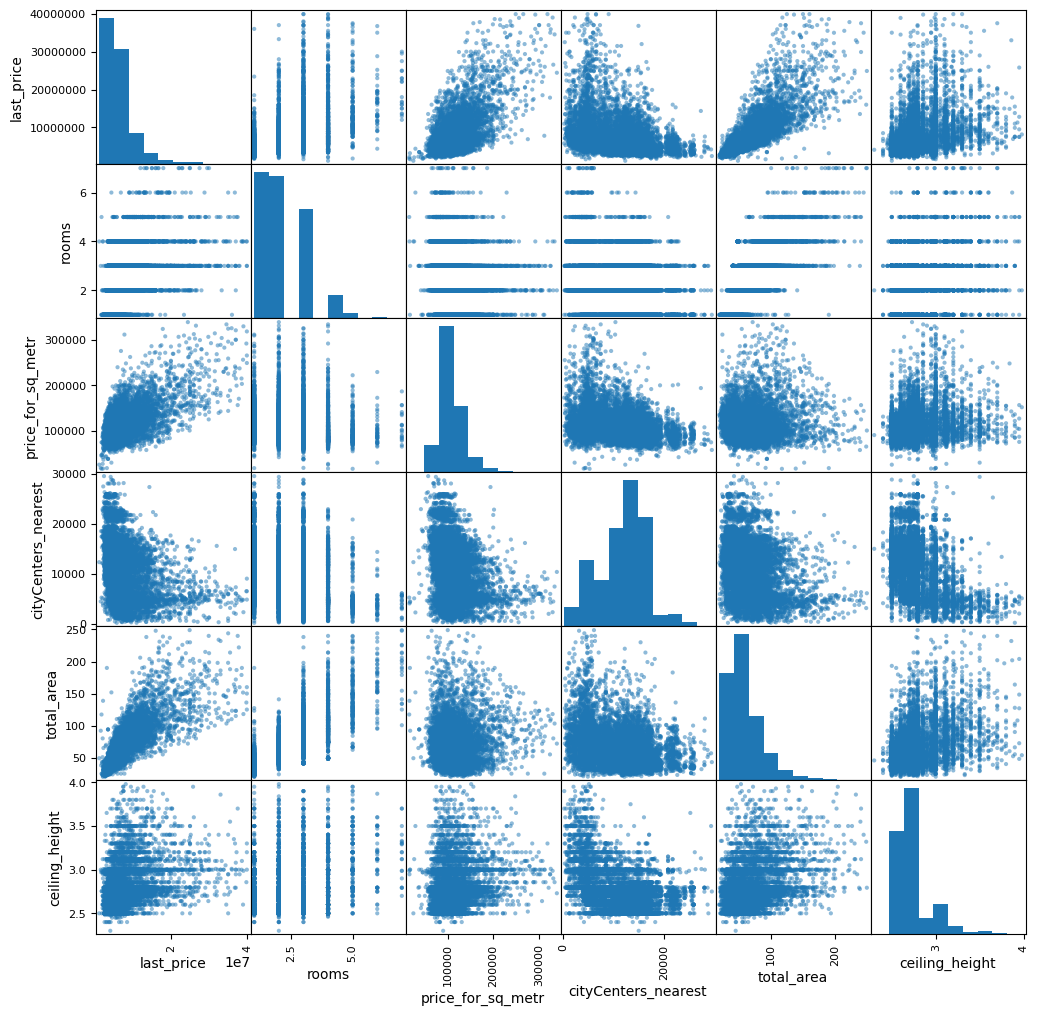

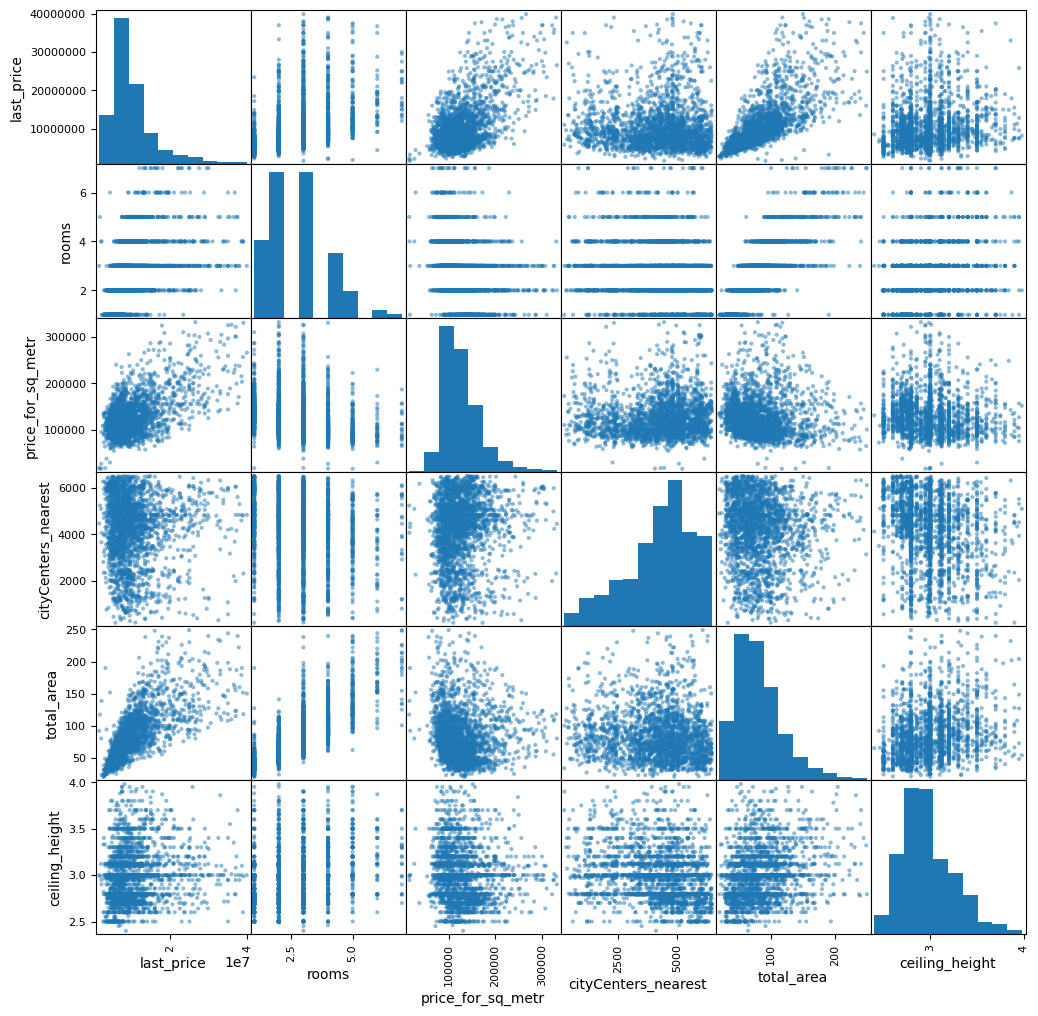

In [41]:
pd.plotting.scatter_matrix(
    spb_adverts[['last_price','rooms','price_for_sq_metr','cityCenters_nearest','total_area','ceiling_height']],
    figsize=(12, 12),grid = True)
pd.plotting.scatter_matrix(
    spb_center_adverts[['last_price','rooms','price_for_sq_metr','cityCenters_nearest','total_area','ceiling_height']],
    figsize=(12, 12),grid = True)

plt.show()

### Вывод

Выделенный сегмент квартир в центральной зоне имеет более премиальный статус по всем параметрам. Квартиры дороже, имеют больше комнат, имеют большую площадь. Касательно зависимости цены от таких факторов как кол-во комнат,цена за метр квадратный, высота потолка, то она имеет схожую тенденцию, что и в остальном городе.

**Выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).**

rooms
1    4.331329e+06
2    6.312539e+06
3    8.481127e+06
4    1.139967e+07
5    1.453364e+07
6    1.634951e+07
7    1.962850e+07
Name: last_price, dtype: float64

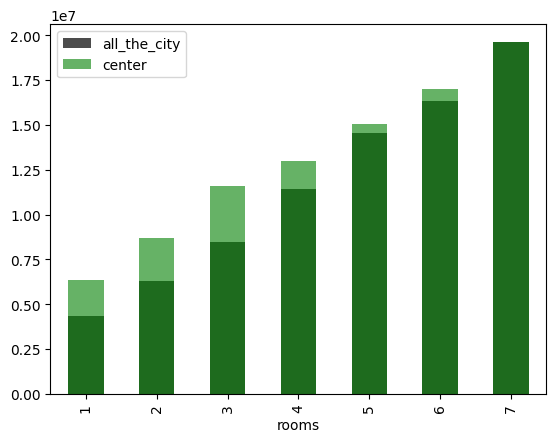

In [42]:
display(spb_adverts.pivot_table(index = 'rooms', values = 'last_price')['last_price'])
spb_adverts.pivot_table(index = 'rooms', values = 'last_price')['last_price'].plot(kind = 'bar', color = 'k',alpha = 0.7,label='all_the_city', legend = True)
spb_center_adverts.pivot_table(index = 'rooms', values = 'last_price')['last_price'].plot(kind = 'bar', sharex = True, alpha = 0.6, color = 'g',stacked = True,label = 'center', legend = True
                                                                                        )
plt.show()


### Вывод 

В центральной зоне квартиры стоят дороже, сильнее всего это сказывается на квартирах с малым кол-вом комнат, чем больше комнат, тем сильнее этот эффект нивелируется.

----

Определим насколько этаж влияет на стоиомсть квартир в центре и в остальном городе

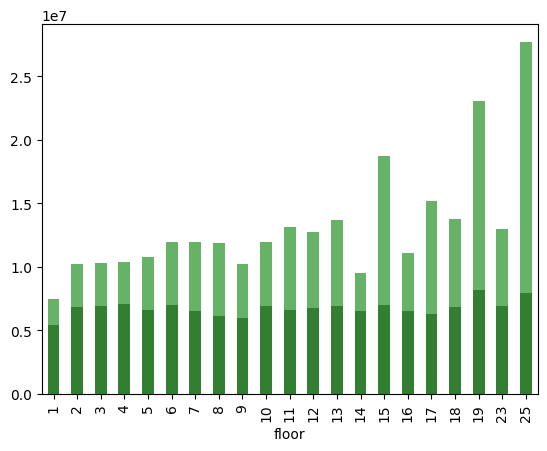

In [43]:
spb_adverts.pivot_table(index = 'floor', values = 'last_price')['last_price'].plot(kind = 'bar', color = 'k',alpha = 0.5)
spb_center_adverts.pivot_table(index = 'floor', values = 'last_price')['last_price'].plot(kind = 'bar', sharex = True, alpha = 0.6, color = 'g',stacked = True)
plt.show()


### Вывод 

Еще раз подтверждается факт, что удаленность от центра один из главных факторов влиящих на стоимость жилья. Особенно это видно на многовысотных зданиях.


---

Определим насколько удаленность от центра влияет на стоиомсть квартир в центре и в остальном городе

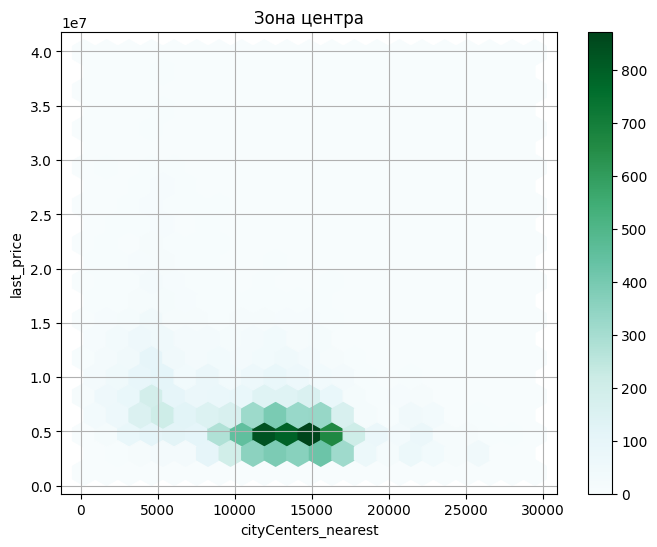

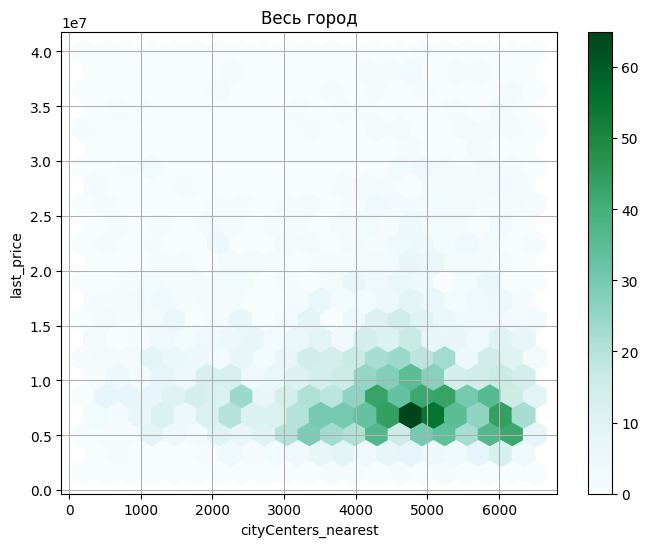

In [44]:
# удаленность от центра
spb_adverts.plot(x='cityCenters_nearest', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), grid=True, sharex=False, title = 'Зона центра')
spb_center_adverts.plot(x='cityCenters_nearest', y='last_price',  kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, title = 'Весь город')
plt.show()

### Вывод

По графикам видно, что наиболее часто встречаемое удаление квартир во всем гороже от центра составляет 10-15км, при стоимости квартир 5млн. В свою очередь центральные квартиры удалены от центра чаще всего на 4-5 км. и стоят от 7.5-10 млн. 


----

Определим насколько дата объявления влияет на стоиомсть квартир в центре и в остальном городе

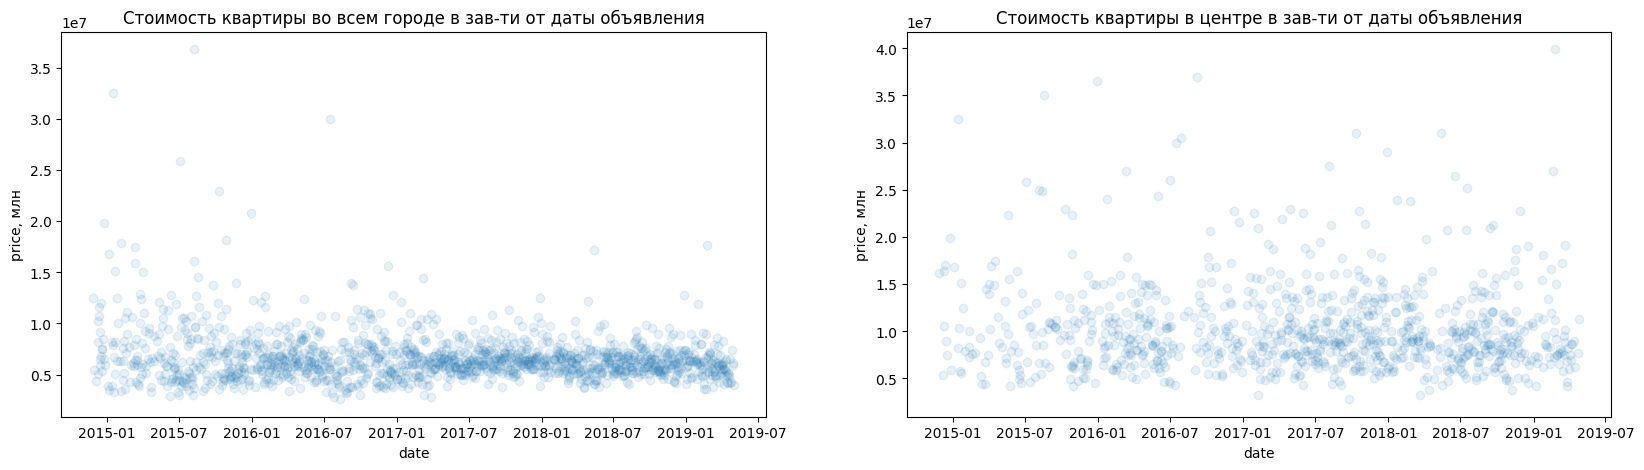

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 5))

ax1.scatter(spb_adverts.pivot_table(index  = 'first_day_exposition', values = 'last_price').index,
           spb_adverts.pivot_table(index  = 'first_day_exposition', values = 'last_price')['last_price'],
           marker ='o', alpha = 0.1)
ax1.set(title = 'Стоимость квартиры во всем городе в зав-ти от даты объявления', xlabel = 'date', ylabel = 'price, млн')

ax2.scatter(spb_center_adverts.pivot_table(index  = 'first_day_exposition', values = 'last_price').index,
           spb_center_adverts.pivot_table(index  = 'first_day_exposition', values = 'last_price')['last_price'],
           marker ='o', alpha = 0.1)
ax2.set(title = 'Стоимость квартиры в центре в зав-ти от даты объявления', xlabel = 'date', ylabel = 'price, млн')

plt.show()

### Вывод

Интересно заметить, что кол-во заявлений о продаже квартир в центре Санкт-Петербурга остается примерно одинаковым от 2016 до 2019 года, по крайней мере увеличение не столь заметно, как в случае всего Санкт-Петербурга. По графикам нельзя заметить, что цена на квартиры существенно выросла за период наблюдений, что имеется. Очевидно, что цена на квартиры в центре выше.

## Общий вывод

Были выполнены все предложенные задания. По каждому заданию был написан отдельный вывод. Одним из самых сложных этапов выполенния работы был поиск критериев для устранения редких и выбивающихся значений, так как в большинстве случаев было необходимо исследовать причину возникновения этих редких значений и выбирать исходя из собственных субъективных догадок.